### TSF TASK 3 - EXPLORATORY DATA ANALYSIS

In this task, I am presented with a data on sales made from a Retail Store and required to carry out an exploratory data analysis on it.

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns

In [2]:
# Importing and checking the dataset

super_store = pd.read_csv("SampleSuperstore.csv")
super_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Checking the shape(rows and columns) of the data

super_store.shape

(9994, 13)

In [4]:
# Checking for sum of null values

super_store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
# Checking the data type

super_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
# Checking the statistics of the data

super_store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# Checking for correlation

super_store.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


<AxesSubplot:>

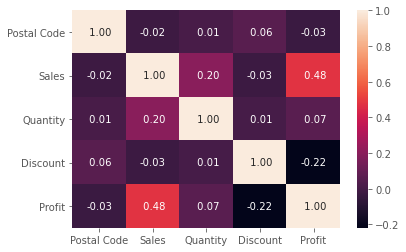

In [8]:
# Visualizing the correlation using the heatmap

sns.heatmap(super_store.corr(), annot = True, fmt = " .2f")

### Answering questions derived from the dataset

In [9]:
# Checking for the various shipping mode

super_store["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [10]:
# 1.Which shipping mode does the customers prefer based on the products category and the quantity

s_mode = super_store[["Ship Mode", "Category", "Quantity"]].groupby(["Ship Mode", "Category"]).sum("Quantity")
s_mode

Quantity
Ship Mode      Category                 
First Class    Furniture            1238
               Office Supplies      3372
               Technology           1083
Same Day       Furniture             453
               Office Supplies      1147
               Technology            360
Second Class   Furniture            1569
               Office Supplies      4480
               Technology           1374
Standard Class Furniture            4768
               Office Supplies     13907
               Technology           4122

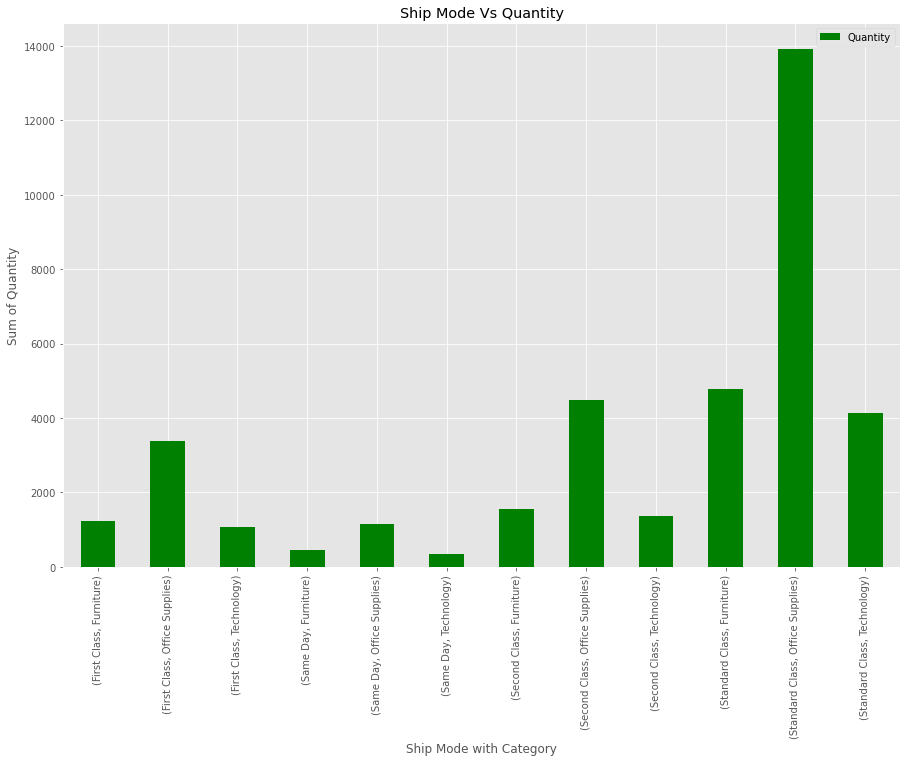

In [11]:
# Visualizing the results of quaestion 1

s_mode.plot(kind = "bar", color = "green", figsize = (15, 10))
plt.xlabel("Ship Mode with Category")
plt.ylabel("Sum of Quantity")
plt.title("Ship Mode Vs Quantity")
plt.show()

From the chart above, it can be concluded that majority of the customers preferred the Standard Class Mode for shipping
as compared to others.

In [12]:
super_store["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [13]:
# 2. In which states were the maximum sales made?

state_sales = pd.pivot_table(data = super_store[["State", "Sales"]], index = ["State"], values = "Sales", aggfunc = "max")
state_sales.sort_values(by = "Sales", ascending = False).head(10)

,Sales
State,
Florida,22638.480
Indiana,17499.950
Washington,13999.960
New York,11199.968
Delaware,10499.970
Michigan,9892.740
Minnesota,9449.950
New Jersey,9099.930
Virginia,8749.950


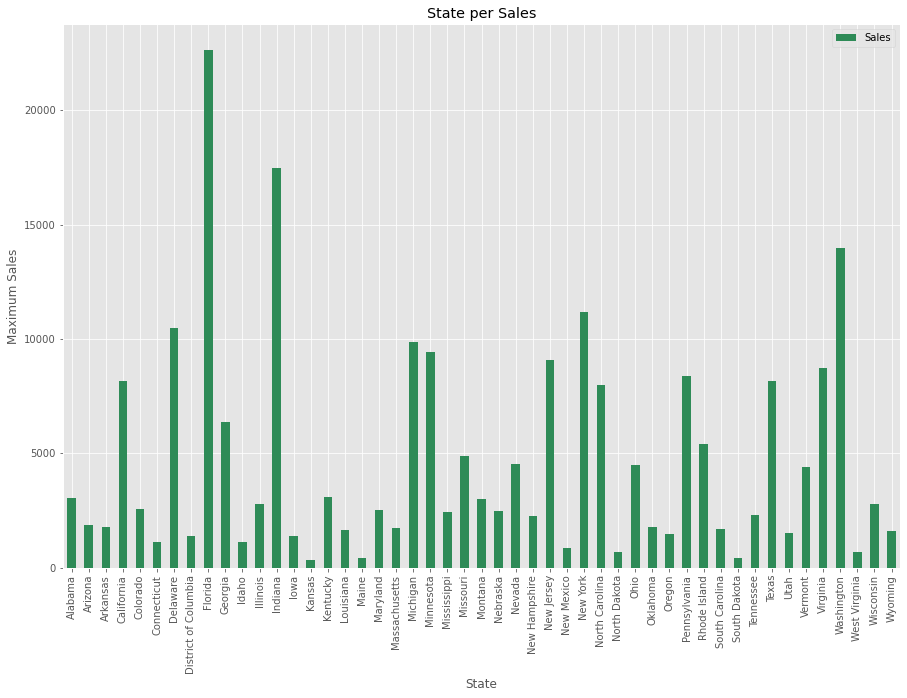

In [14]:
# Visualizing the result of question 2

state_sales.plot(kind = "bar", color = "seagreen", figsize = (15, 10))
plt.xlabel("State")
plt.ylabel("Maximum Sales")
plt.title("State per Sales")
plt.show()

The results of Question 2 showed that maximum sales were made in Florida.

In [15]:
# 3. In which State were the maximum profit made?

state_profit = pd.pivot_table(data = super_store[["State", "Profit"]], index = ["State"], values = "Profit", aggfunc = "max")
state_profit.sort_values(by = "Profit", ascending = False).head(10)

,Profit
State,
Indiana,8399.9760
Washington,6719.9808
Delaware,5039.9856
Michigan,4946.3700
Minnesota,4630.4755
New York,3919.9888
Georgia,3177.4750
Virginia,2799.9840
Rhode Island,2591.9568


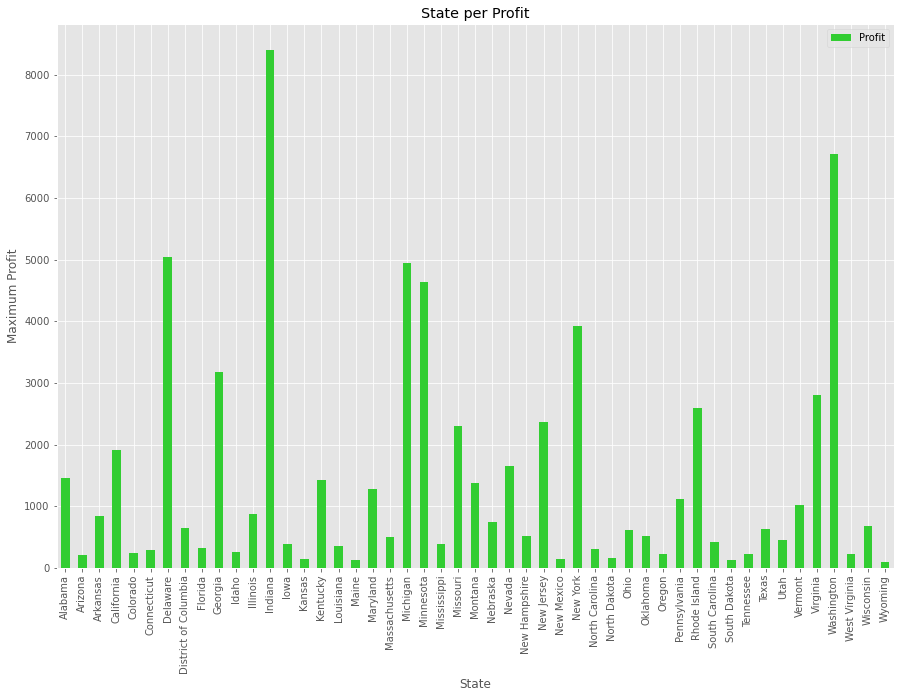

In [16]:
# Visualizing the result of question 3

state_profit.plot(kind = "bar", color = "limegreen", figsize = (15, 10))
plt.xlabel("State")
plt.ylabel("Maximum Profit")
plt.title("State per Profit")
plt.show()

The Chart above showed that the maximum profit were made from Indiana.

In [17]:
# 4. Which products were sold the most?

product_sales = pd.pivot_table(data = super_store[["Category", "Sub-Category", "Sales"]], index = ["Category", "Sub-Category"], 
                               values = "Sales", aggfunc = "max")
product_sales

Sales
Category        Sub-Category           
Furniture       Bookcases      4404.900
                Chairs         4416.174
                Furnishings    1336.440
                Tables         4297.644
Office Supplies Appliances     2625.120
                Art            1113.024
                Binders        9892.740
                Envelopes       604.656
                Fasteners        93.360
                Labels          786.480
                Paper           733.950
                Storage        2934.330
                Supplies       8187.650
Technology      Accessories    3347.370
                Copiers       17499.950
                Machines      22638.480
                Phones         4548.810

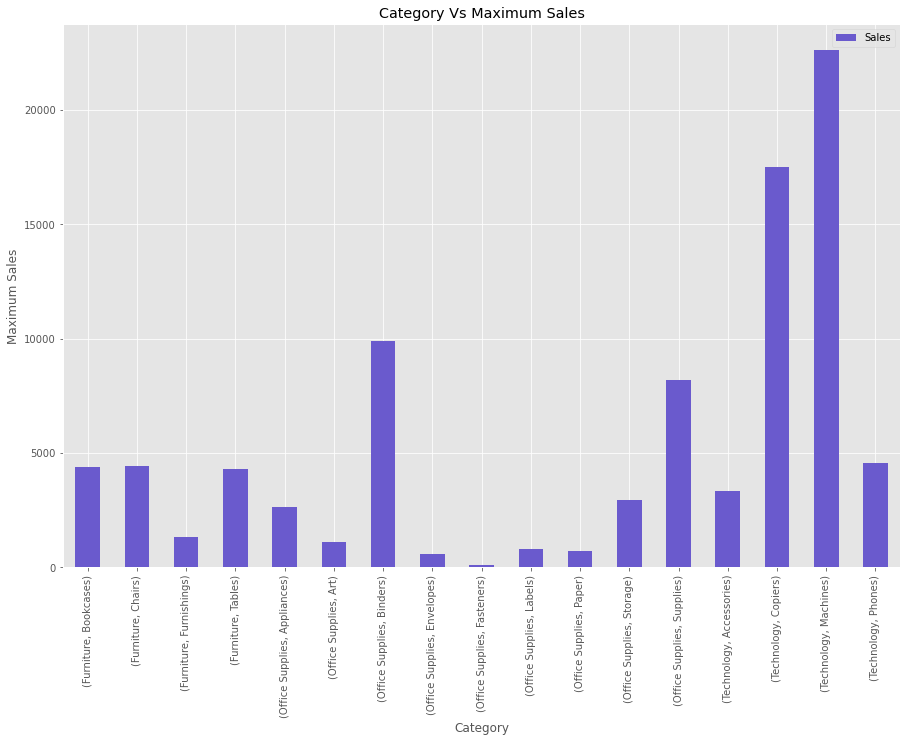

In [18]:
# Visualizing the result of Question 4

product_sales.plot(kind = "bar", color = "slateblue", figsize = (15, 10))
plt.xlabel("Category")
plt.ylabel("Maximum Sales")
plt.title("Category Vs Maximum Sales")
plt.show()

Machines in the Technology Category were sold the most.

In [19]:
# 5. Which products were purchased the most in terms of Quantity?

product_quantity = pd.pivot_table(data = super_store[["Category", "Sub-Category", "Quantity"]], index = ["Category", "Sub-Category"], 
                               values = "Quantity", aggfunc = "sum")
product_quantity

Quantity
Category        Sub-Category          
Furniture       Bookcases          868
                Chairs            2356
                Furnishings       3563
                Tables            1241
Office Supplies Appliances        1729
                Art               3000
                Binders           5974
                Envelopes          906
                Fasteners          914
                Labels            1400
                Paper             5178
                Storage           3158
                Supplies           647
Technology      Accessories       2976
                Copiers            234
                Machines           440
                Phones            3289

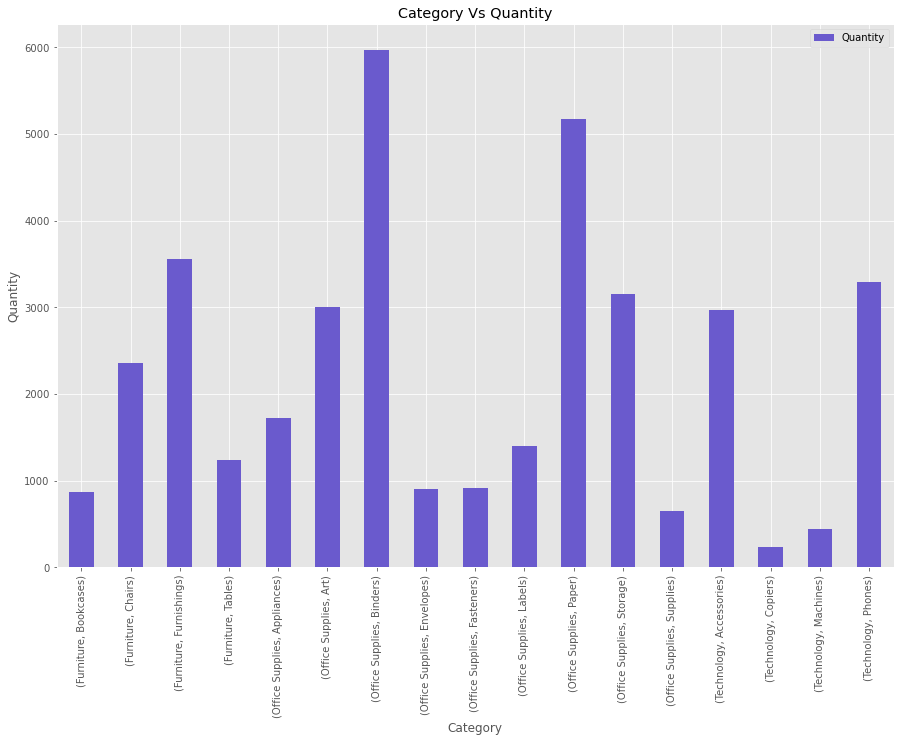

In [20]:
# Visualizing the result of Question 5

product_quantity.plot(kind = "bar", color = "slateblue", figsize = (15, 10))
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.title("Category Vs Quantity")
plt.show()

The Chart above showed that large quantities of Binders from the Office Supplies Category were sold the most as compared to others.

In [21]:
# 6. Which products brought in the maximum profit?

product_profit = pd.pivot_table(data = super_store[["Category", "Sub-Category", "Profit"]], index = ["Category", "Sub-Category"], 
                               values = "Profit", aggfunc = "max")
product_profit

Profit
Category        Sub-Category           
Furniture       Bookcases     1013.1270
                Chairs         770.3520
                Furnishings    387.5676
                Tables         629.0100
Office Supplies Appliances     793.7160
                Art            112.5740
                Binders       4946.3700
                Envelopes      204.0714
                Fasteners       21.8880
                Labels         385.3752
                Paper          352.2960
                Storage        792.2691
                Supplies       327.5060
Technology      Accessories    829.3754
                Copiers       8399.9760
                Machines      2799.9840
                Phones        1228.1787

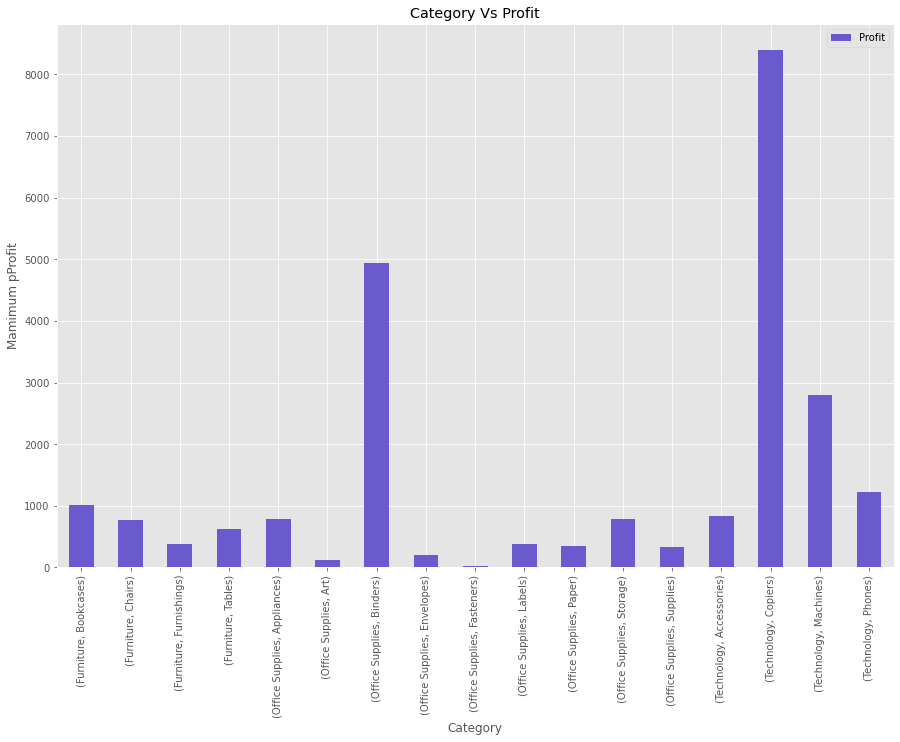

In [22]:
# Visualizing the result of Question 6

product_profit.plot(kind = "bar", color = "slateblue", figsize = (15, 10))
plt.xlabel("Category")
plt.ylabel("Mamimum pProfit")
plt.title("Category Vs Profit")
plt.show()

As shown above, the sales of Copiers in the Technology Category, brought in the maximum profit.

In [23]:
# 7. In which region of the Country were the highest sales made?

grouped_by_reg = super_store.groupby("Region")["Sales"].sum()
grouped_by_reg

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

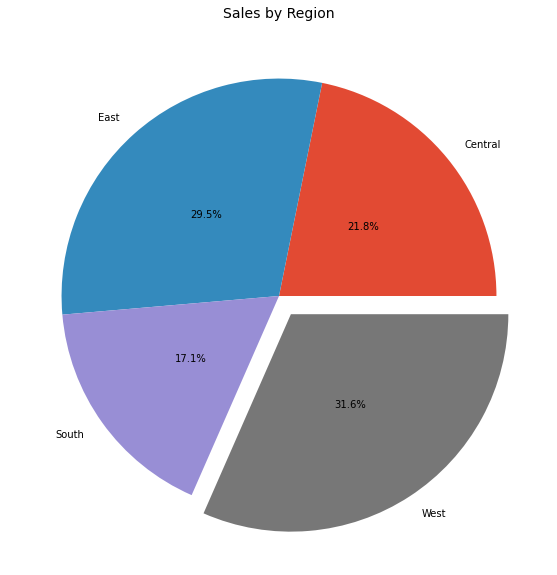

In [36]:
# Visualizing the sales made in the various regions

pie, ax = plt.subplots(figsize=[15,10])
labels = grouped_by_reg.keys()
plt.pie(x=grouped_by_reg, autopct="%.1f%%", explode=[0, 0, 0, 0.1], labels=labels, pctdistance=0.5)
plt.title("Sales by Region", fontsize=14)

plt.show()

As shown above, more sales were made in the western region of the country.

In [33]:
# 8. In which region of the country was the maximum profit made?

reg_profit = super_store.groupby("Region")["Profit"].sum()
reg_profit

Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64

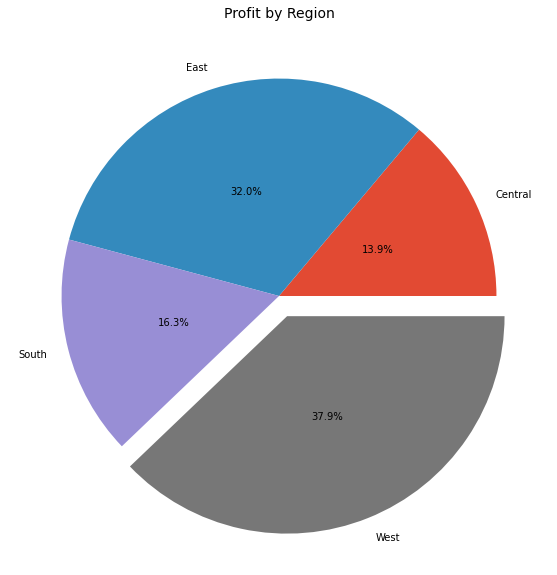

In [35]:
# Visualizing the most profitable region

pie, ax = plt.subplots(figsize=[15,10])
labels = reg_profit.keys()
plt.pie(x=reg_profit, autopct="%.1f%%", explode=[0, 0, 0, 0.1], labels=labels, pctdistance=0.5)
plt.title("Profit by Region", fontsize=14)

plt.show()

As seen above, the Western region is the most profitable followed by the Eastern region.

In [25]:
# 9. Which Customer Segment is the most profitable?

customer_seg = pd.DataFrame(super_store.groupby(["Segment"])["Profit"].sum())
customer_seg

,Profit
Segment,
Consumer,134119.2092
Corporate,91979.1340
Home Office,60298.6785


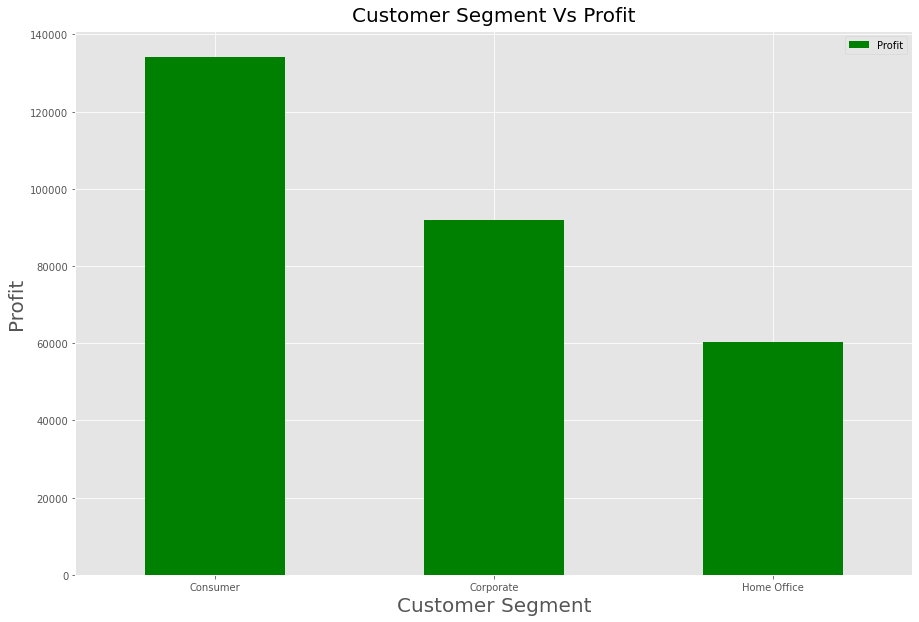

In [32]:
# Visualizing the customer segment

customer_seg.plot(kind = "bar", color = "green", figsize = (15, 10))
plt.xlabel("Customer Segment", size = 20)
plt.xticks(rotation = 0)
plt.ylabel("Profit", size = 20)
plt.title("Customer Segment Vs Profit", fontsize = 20, pad = 10)
plt.show()

From the chart above, it is seen that the Consumer segment is the most profitable followed by Corporate and Home office segment.
Therefore, marketing strategies should focus more on the Consumer and Corporate Customers.

THANK YOU
